This code is designed to retrieve surface information from input A-D image files and given instrument response parameters

In [1]:
# Generic imports
import sys; sys.path.insert(0, '../')
import copy
import os
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D
from numpy import \
matrix, linspace, meshgrid, sin, cos, array, sqrt, pi, diff, mean, median, std, arcsin, zeros, random, \
size, reshape, shape, vstack, eye, diag, nan_to_num, ones, loadtxt, savetxt, append, squeeze
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image, ImageFont, ImageDraw

# Application-specific imports
import facetbrightnessstuff9 as fbs
import imagestuff as ims
import gradstuff as gds

# Graphics imports and parameters
#%matplotlib inline
%matplotlib notebook
fontsize = 20
linewidth = 2
matplotlib.rcParams.update({'font.size': fontsize})

CUDA not available.


In [2]:
# Set up a grid of surface normal vectors and the backscatter response on them
nptsx = 103
nptsy = 101
nxmid = int(nptsx/2); #print nxmid
nymid = int(nptsy/2); #print nymid
nmax = 5
nxi = linspace(-nmax,nmax,nptsx); dnx = nxi[1]-nxi[0]
nyi = linspace(-nmax,nmax,nptsy); dny = nyi[1]-nyi[0]
nxigrid,nyigrid = meshgrid(nxi,nyi)
theta = 15*pi/180
sA = (-nxigrid*sin(theta)+cos(theta)-1)/(1+nxigrid**2+nyigrid**2)**.5
sB = (-nyigrid*sin(theta)+cos(theta)-1)/(1+nxigrid**2+nyigrid**2)**.5
sC = (+nxigrid*sin(theta)+cos(theta)-1)/(1+nxigrid**2+nyigrid**2)**.5
sD = (+nyigrid*sin(theta)+cos(theta)-1)/(1+nxigrid**2+nyigrid**2)**.5

In [3]:
# This box is about defining the input data

#case = 'case1'
#case = 'case1.6'
#case = 'case1.11'
#case = 'case1.14'
#case = 'case1.17'
#case = 'case1.21'
#case = 'case1.25'
#case = 'case1.7'
#case = 'case1.8'
#case = 'case1.12'
#case = 'case1.15'
#case = 'case1.19'
#case = 'case1.24'
#case = 'case1.3'
#case = 'case1.16'
#case = 'case1.18'
#case = 'case1.26'
#case = 'case1.27'

##############################################################################################################
if case == 'case1':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_full2'    
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    #These ones get the pyramidal edge
    nysegments = 1
    nxsegments = 4
    nacross = 30
    ndown = 20
    nxstart = 210
    ny1start = 300    
#     #These ones get the prismatic edge
#     nysegments = 4
#     nxsegments = 1
#     nacross = 20
#     ndown = 30
#     nxstart = 300
#     ny1start = 100
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912

##############################################################################################################
if case == 'case1.6':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough6'    
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 2
    nxsegments = 2
    nacross = 50
    ndown = 40
    nxstart = 90
    ny1start = 50
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912

##############################################################################################################
elif case == 'case1.11':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough11'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 80
    ndown = 80
    nxstart = 90
    ny1start = 50
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912

##############################################################################################################
elif case == 'case1.14':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough14'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 40
    ndown = 40
    nxstart = 250
    ny1start = 25
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.17':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough17'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 40
    ndown = 40
    nxstart = 240
    ny1start = 75
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912

##############################################################################################################
elif case == 'case1.21':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough21'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 40
    ndown = 40
    nxstart = 50
    ny1start = 195
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.25':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough25'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 40
    ndown = 40
    nxstart = 90
    ny1start = 195
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.7':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough7'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 90
    ny1start = 175
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.8':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough8'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 90
    ny1start = 175
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.12':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough12'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 90
    ny1start = 175
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.15':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough15'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 90
    ny1start = 195
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.19':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough19'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 4
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 130
    ny1start = 155
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.24':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough24'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 3
    nxsegments = 4
    nacross = 50
    ndown = 50
    nxstart = 210
    ny1start = 135
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912
    
##############################################################################################################
elif case == 'case1.3':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough3'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 1
    nxsegments = 1
    nacross = 80
    ndown = 40
    nxstart = 110
    ny1start = 235
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912

##############################################################################################################
elif case == 'case1.16':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough16'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 2
    nxsegments = 2
    nacross = 50
    ndown = 50
    nxstart = 260
    ny1start = 280
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912  
    
##############################################################################################################
elif case == 'case1.18':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough18'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 2
    nxsegments = 2
    nacross = 60
    ndown = 60
    nxstart = 215
    ny1start = 120
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912  
    
##############################################################################################################
elif case == 'case1.26':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough26'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 2
    nxsegments = 2
    nacross = 60
    ndown = 60
    nxstart = 215
    ny1start = 70
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912  

##############################################################################################################
elif case == 'case1.27':
    
    # Specify & read the input dataset, including spacing in micrometers
    f1 = '2016-08-09_ice1_rough27'
    f2 = '/SEMimages'
    upperpath = case
    dx,dy,cA,cB,cC,cD,Filename = ims.getc(upperpath, f1, f2)
    print "Filename, dx, and dy", Filename, dx, dy

    # Define segments
    nx1list = []; nx2list = []
    ny1list = []; ny2list = []
    nysegments = 2
    nxsegments = 2
    nacross = 60
    ndown = 60
    nxstart = 215
    ny1start = 70
    ny2start = ny1start+ndown
    for ix in range(nxsegments):
        nx1start = nxstart+ix*nacross; nx2start = nxstart+(ix+1)*nacross 
        for i in range(nysegments):
            nx1list.append(nx1start); nx2list.append(nx2start)
            ny1list.append(ny1start+i*ndown); ny2list.append(ny2start+i*ndown)
    nsegments = nxsegments*nysegments

    pA = 101.04798753 , 106.958873177
    pB = 90.1823777937 , 76.3561483181
    pC = 95.8244330336 , 77.4315996502
    pD = 104.429731424 , 87.5491460912  

    
else:
    print 'Bad choice of case'

    
# Set up the grids     
BSgridA = np.polyval(pA,sA)
BSgridB = np.polyval(pB,sB)
BSgridC = np.polyval(pC,sC)
BSgridD = np.polyval(pD,sD)

# Setting up sub-grids in case of multiple segments
nyxgrid = []
for i in range(nsegments):
    nyxgridi = [ (y, x) for y in range(ny1list[i], ny2list[i]+1) for x in range(nx1list[i], nx2list[i]+1) ]
    nyxgrid.append(nyxgridi)
    
# Printing segments
print 'nsegments = ', nsegments


IOError: [Errno 2] No such file or directory: 'case1.14/SEMimages/2016-08-09_ice1_rough14-A.bmp'

<IPython.core.display.Javascript object>


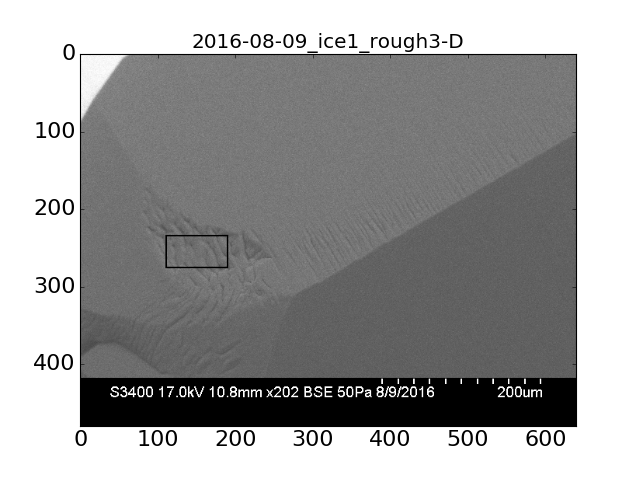

In [7]:
# Graph the segments
f3 = f1+'-D'
Filename = upperpath+f2+"/" +f3+'.bmp'
im = Image.open(Filename)
ny_im,nx_im = np.shape(im)
draw = ImageDraw.Draw(im)
fig, ax = plt.subplots()
for i in range(nsegments):
    nx1 = nx1list[i]
    nx2 = nx2list[i]
    ny1 = ny1list[i]
    ny2 = ny2list[i]
    ims.myrectangle(draw,(nx1,ny1),(nx2,ny2),2)
ax.set_title(f3,fontsize=fontsize*0.9)
Iwantmicrons = False
if Iwantmicrons:
    ax.imshow(im,cmap = 'Greys_r', vmin = 0,vmax = 255, extent=[0,nx_im*dx,0,ny_im*dy])
    ax.set_xlabel(r'$x \ (\mu m)$',fontsize=fontsize*1.1)
    ax.set_ylabel(r'$y \ (\mu m)$',fontsize=fontsize*1.1)
else:
    ax.imshow(im,cmap = 'Greys_r', vmin = 0,vmax = 255)
fig.savefig(case+'/SEMSegments.jpg')

In [68]:
# Graphing the response function for each detector
BSgridN = [BSgridA, BSgridB, BSgridC, BSgridD]
BSgridL = ['A', 'B', 'C', 'D']
BSmax = 150 # this for display purposes
nxigrid.shape

(101, 103)

In [8]:
# Set up interpolators for detector responses
Arule, Brule, Crule, Drule, \
KAxrule, KAyrule, KBxrule, KByrule, KCxrule, KCyrule, KDxrule, KDyrule =\
fbs.setupdetectorresponse2(BSgridA, BSgridB, BSgridC, BSgridD, nxi, nyi, dnx, dny)

In [9]:
# Create a blank slate
solution = zeros(cA.shape)

In [10]:
# Generic retrieval parameters
maxiter = 5
tolerance = 10

In [11]:
# Create the a priori/solution set, and the uncertainty set
    
# Define the variance in the observations (BS units^2)
noiseamp = 5.0
print 'Std deviation in input signal is', noiseamp**.5

# Define parameters determining the variance in the a priori (microns^2)
apriorivar0 = 100.0
print 'Std deviation in a priori is', apriorivar0**.5

# Create the initial a priori variance
apriorivar = ones(cA.shape)*apriorivar0

# Create the initial a priori set
aprioriset = zeros(cA.shape)

Std deviation in input signal is 2.2360679775
Std deviation in a priori is 10.0


In [ ]:
# Loop to retrieve each segment
for isegment in range(nsegments):
    
    # Choose the particular location of the dataset to analyze
    nx1=nx1list[isegment]; nx2=nx2list[isegment]; nx = nx2-nx1+1
    ny1=ny1list[isegment]; ny2=ny2list[isegment]; ny = ny2-ny1+1

    # Construct gradients
    Ny_unscaled, Nx_unscaled = gds.makeNxNy(ny,nx)
    Ny = Ny_unscaled/dy
    Nx = -Nx_unscaled/dx #fixing x inversion
    
    # Number of observations
    nobs = (nx-1)*(ny-1)*4

    # Number of desired points (heights)
    nzpts = ny*nx-1
    
    # Extract the a priori variance
    vartemp = apriorivar[ny1:ny2+1,nx1:nx2+1]
    vartemp_long = reshape(vartemp,nzpts+1,0)
    Sa = diag(vartemp_long[:-1]); #print "apriorivar", shape(Sa)
    
    # Extract the starting z
    settemp = solution[ny1:ny2+1,nx1:nx2+1]
    settemp_long = reshape(settemp,nzpts+1,0)
    settemp_longminus1 = settemp_long[:-1]
    z_start = matrix(settemp_longminus1).T; #print "aprioriset", shape(z_start)
    z_start = z_start*0.0; #print "aprioriset", shape(z_start)

    # Construct the variance in observation + model
    Se = matrix(eye(nobs))*noiseamp # Variance in observation + model (c)

    # Do the retrieval
    print "for", nx1, ny1
    print "Segment:", isegment+1, "of", nsegments
    z_retrieved = fbs.retrievesegment(\
        nx1,ny1,nx2,ny2,cA,cB,cC,cD,\
        Sa,Se,z_start,maxiter,tolerance,\
        Nx,Ny,\
        Arule, Brule, Crule, Drule,\
        KAxrule, KAyrule, \
        KBxrule, KByrule, \
        KCxrule, KCyrule, \
        KDxrule, KDyrule)
    
    if isegment == 0:
        solution[ny1:ny2+1,nx1:nx2+1] = copy.copy(z_retrieved)
    else:
        nextsolution = zeros(cA.shape)
        nextsolution[ny1:ny2+1,nx1:nx2+1] = copy.copy(z_retrieved)
        overlap = []
        for i in range(isegment):
            nextoverlap = list( set(nyxgrid[i])&set(nyxgrid[isegment]) )
            overlap = overlap + nextoverlap
            Noverlap = len(overlap); 
        print "Noverlap =", Noverlap
        diff = 0.0
        for j in range(Noverlap):
            diff += nextsolution[overlap[j]] - solution[overlap[j]]
        diffavg = diff/Noverlap
        z_retrieved -= diffavg
        solution[ny1:ny2+1,nx1:nx2+1] = copy.copy(z_retrieved)

for 110 235
Segment: 1 of 1
statistics of observed intensities (detector B):
('mean =', 70.279375000000002)
('max =', 92.0)
('min =', 52.0)
('iteration, di2', 0, matrix([[ 216088.84763702]]))

120
120


<IPython.core.display.Javascript object>


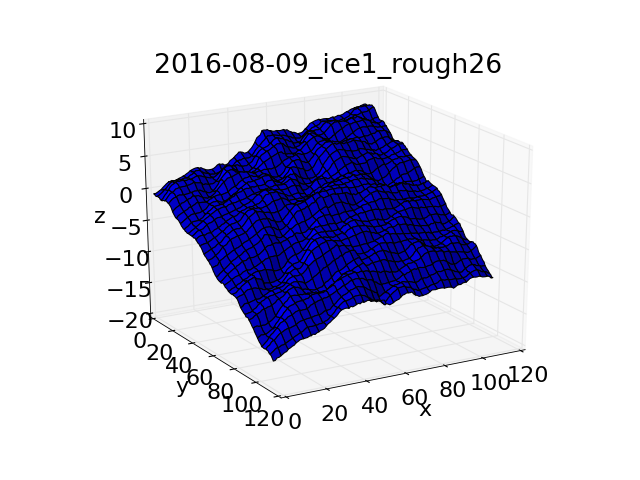

In [74]:
# Show the reconstructed surface
nx1tot = min(nx1list)
nx2tot = max(nx2list)
ny1tot = min(ny1list)
ny2tot = max(ny2list)
nxtot = nx2tot-nx1tot; print (nxtot)
nytot = ny2tot-ny1tot; print (nytot)
ymaxtot = (nytot-1)*dy; xmaxtot = (nxtot-1)*dx

surf_ytot = linspace(0,ymaxtot,nytot); #print surf_ytot[1]-surf_ytot[0]; 
surf_xtot = linspace(0,xmaxtot,nxtot); #print surf_xtot[1]-surf_xtot[0]; 
surf_xgridtot, surf_ygridtot = meshgrid(surf_xtot,surf_ytot)
settemp = solution[ny1tot:ny2tot,nx1tot:nx2tot]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(surf_xgridtot, surf_ygridtot, settemp, rstride=4,cstride=4)
ax.invert_yaxis() # invert y axis (this fixes the right-hand-oriented vs left-hand-oriented system)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f1)
ax.view_init(azim=-120,elev=22)
#save an image
fig.savefig(case+'/Retrieved.jpg')

In [75]:

# # Graphing kernels
# fig = plt.figure()
# plt.plot(nxi,KAxrule(nxi,0))
# plt.xlabel('nx')
# #plt.ylim([-100,100])
# plt.grid('on')

# fig = plt.figure()
# plt.plot(nyi,KAxrule(0,nyi))
# plt.xlabel('ny')
# #plt.ylim([-200,200])
# plt.grid('on')

In [76]:
# for i in range(len(BSgridN)):
#     BSgridn = BSgridN[i]
#     BSgridl = BSgridL[i]
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(nxigrid, nyigrid, BSgridn, rstride=3, cstride=3)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
#     ax.set_title(BSgridl)
#     ax.set_zlim((0,BSmax))

In [77]:
# fig = plt.figure()
# plt.subplot(1,2,1)
# plt.plot(nxi,BSgridA[nymid,:])
# plt.xlabel('nx')
# plt.grid('on')
# plt.subplot(1,2,2)
# plt.plot(nyi,BSgridA[:,nxmid])
# plt.xlabel('ny')
# plt.grid('on')

In [78]:
# Save this data
print "saving", case
casefolder = case+'/'
if not os.path.exists(casefolder):
        os.makedirs(casefolder)
filename = case+'/'+'retrieved'
np.savez_compressed(filename, \
                    f1=f1, \
                    f2=f2, \
                    upperpath=upperpath, \
                    nx1list=nx1list, \
                    nx2list=nx2list, \
                    ny1list=ny1list, \
                    ny2list=ny2list, \
                    pA=pA, \
                    pB=pB, \
                    pC=pC, \
                    pD=pD, \
                    sA=sA, \
                    sB=sB, \
                    sC=sC, \
                    sD=sD, \
                    nxi=nxi, \
                    nyi=nyi, \
                    dnx=dnx, \
                    dny=dny, \
                    solution=solution)

saving case1.26
